In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [5]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv", header=0, delimiter='\t',quoting=3)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/testData.tsv", header=0, delimiter='\t',quoting=3)

"""
header = 0 은 파일의 첫번째 줄에 열 일므이 있음을 나타냄
delimiter = '\t'는 필드가 탭으로 구분되는 것을 의미한다
quoting = 3은 쌍 따옴표를 무시한다
"""

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv'

In [7]:
train = pd.read_csv('./Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv', header=0, delimiter= '\t', quoting=3)
test = pd.read_csv('./Bag_of_Word_Meets_Bags_of_Popcorn/testData.tsv', header=0, delimiter= '\t', quoting=3)

In [8]:
train.shape

(25000, 3)

In [9]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [10]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [11]:
# sentiment는 긍정과 부정을 나타냄 1은 긍정 0 은 부정

In [12]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv', header=0, delimiter='\t')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv'

In [54]:
sample =  pd.read_csv('./Bag_of_Word_Meets_Bags_of_Popcorn/labeledTrainData.tsv', header=0, delimiter= '\t')

In [55]:
sample.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [13]:
#quoting = 3은 쌍따옴표를 무시한다고 되어있는데 적용을하지 않으면 쌍따옴표를 가지고 오지 않음

In [13]:
test.shape

(25000, 2)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [15]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [16]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [17]:
#정확히 5:5로 데이터가 나눠져있는것을 확인 할 수 있다.

In [18]:
train.describe(exclude=[np.number])

,id,review
count,25000,25000
unique,25000,24904
top,"""204_10""","""You do realize that you've been watching the ..."
freq,1,3


In [19]:
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [20]:
from bs4 import BeautifulSoup

In [21]:
examplel = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
examplel.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [22]:
import re

#소문자와 대문자가 아닌 것은 공백으로 대체한다.
#[^ 문자];를 제외하라는 정규표현식 ^은 not 의미

letters_only = re.sub('[^a-zA-Z]',' ', examplel.get_text())
letters_only

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [23]:
lower_case = letters_only.lower()

words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [24]:
#lower을 이용해 모두 소문자로 바꿔줌, with, all, this 와 같은 대명사나 전치사는 어떠한 정보를 갖고 있다고 보기 힘듬 그러니 정리해준다.

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ijiyeong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
#불용어 제거

words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [27]:
#포터 스테머
stemmer = nltk.stem.PorterStemmer()

print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [28]:
#랭커스터 스태머의 사용예

from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximun'))
print("The stemmed form of running is: {}". format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}". format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}". format(lancaster_stemmer.stem("run")))

maximun
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [29]:
#처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [30]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english') #snowballstemmer는 어떤 언어를 할 지 첫번쨰 인자에서 정해야함
words = [stemmer.stem(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [31]:
def review_to_words(raw_review):
  #1. html remove
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
  #2. blank exchange
  letters_only = re.sub('[^a-zA-Z]',' ', review_text)
  #3. lower exchange
  words = letters_only.lower().split()
  #4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
  #stopwords를 세트로 형변환 한다
  stops = set(stopwords.words('english'))
  #5. Stopwords를 이용해 불용어 제거
  meaningful_words = [w for w in words if not w in stops]
  #6. 어간추출
  stemming_words = [stemmer.stem(w) for w in meaningful_words]
  #7. 공백으로 구분된 문자열로 결합하여 결과를 변환
  return(" ".join(stemming_words))



In [32]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [33]:
num_reviews = train['review'].size
num_reviews

25000

In [34]:
clean_train_reviews = []
for i in range(0, num_reviews):
  if (i+1) % 5000 == 0:
    print('Review {} of {}'.format(i+1, num_reviews))
  clean_train_reviews.append(review_to_words(train['review'][i]))

Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000


In [35]:
%time train['review_clean'] = train['review'].apply(review_to_words)

CPU times: user 54.4 s, sys: 2.09 s, total: 56.5 s
Wall time: 57.5 s


In [38]:
from multiprocess import Pool
import numpy as np

In [39]:
def _apply_df(args):
  df, func, kwargs = args
  return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
  workers = kwargs.pop('workers')
  pool = Pool(processes=workers)
  result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
  pool.close()

  return pd.concat(list(result))

In [64]:
%time

clean_train_reviews = apply_by_multiprocessing(train['review'], review_to_words, workers=4)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [65]:
%time

clean_test_reviews = apply_by_multiprocessing(test['review'], review_to_words, workers=4)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [66]:
#단어 수
train['num_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
#중복을 제거한 단어 수
train['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

In [67]:
test['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))

In [68]:
#위 함수에 대한 이해를 위해 첫 번째 리뷰로 돌아가는 모습을 체크

x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

리뷰별 단어 평균 값 : 119.52356
리뷰별 단어 중간 값 : 89.0
리뷰별 고유 단어 평균 값 : 94.05756
리뷰별 고유 단어 중간 값 : 74.0


/Users/ijiyeong/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ijiyeong/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '리뷰별 고유한 단어 수 분포')

/Users/ijiyeong/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ijiyeong/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ijiyeong/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ijiyeong/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ijiyeong/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, fla

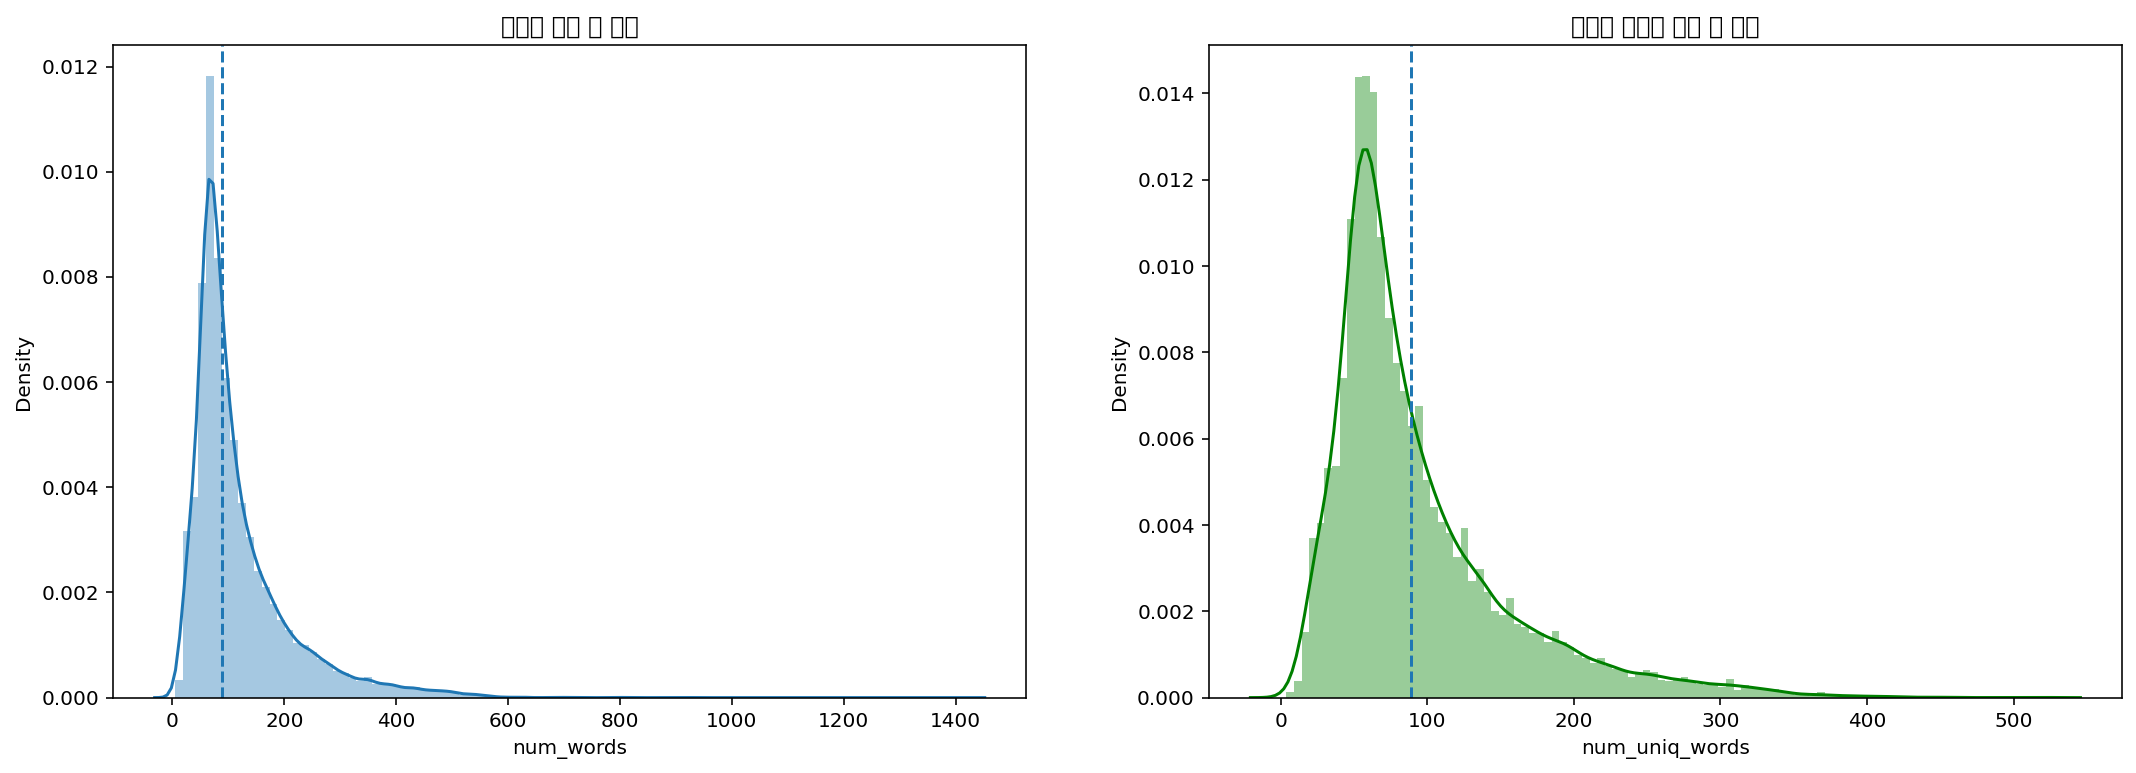

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰별 단어 평균 값 :', train['num_words'].mean())
print('리뷰별 단어 중간 값 :', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed') #중간값 표시
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 값 :', train['num_uniq_words'].mean())
print('리뷰별 고유 단어 중간 값 :', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_words'].median(), linestyle='dashed')
axes[1].set_title('리뷰별 고유한 단어 수 분포')

#Vector

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

#튜토리얼과 다르게 파라메터 값을 수정해서 적용
# 파라메터 값만 수정해도 캐글 스코어와 많은 차이가 남

vectorizer = CountVectorizer(analyzer= "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2, #토큰이 나타날 최소 문서 갯수
                             ngram_range=(1,3),
                             max_features = 20000
                             )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [71]:
#pipeline은 features engineering의 여러과정을 묶어 사용할때 사용한다.
#그러나 여기서는 한개의 과정만을 사용하기에 불필요할 수 있으나 그냥 사용하기로 한다. 경험상

pipeline = Pipeline([
                     ('vect', vectorizer),
])

In [72]:
%time
train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [73]:
train_data_features.shape

(25000, 20000)

In [74]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [75]:
#vector화 되어진 피쳐를 확인해본다.

import numpy as np

dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist):
  print(count, tag)

pd.DataFrame(dist, columns=vocab)

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,...,23,52,37,89,161,31,71,59,40,23


In [76]:
#randomfrest를 이용해 분석

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=10)
forest


RandomForestClassifier(n_jobs=-1, random_state=10)

In [77]:
%time
forest = forest.fit(train_data_features, train['sentiment'])

CPU times: user 6 µs, sys: 14 µs, total: 20 µs
Wall time: 22.6 µs


In [78]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
                forest, train_data_features,\
                train['sentiment'], cv=10, scoring='roc_auc'))

CPU times: user 9.4 s, sys: 3.32 s, total: 12.7 s
Wall time: 1min 47s


In [79]:
score

0.9282938239999998

In [80]:
clean_test_reviews[0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [81]:
%time
test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [82]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
#벡터화 하며 만든 사전에서 해당 단어가 무엇인지 확인이 가능하다.
#vocab = vectorizer.get_feature_names()

vocab[8], vocab[1004], vocab[409]

('abc', 'audienc know', 'alert')

In [87]:
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

kaggle에 제출하기위한 준비

In [88]:
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [89]:
output.to_csv('./Bag_of_Word_Meets_Bags_of_Popcorn/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [90]:
output_sentiment = output['sentiment'].value_counts()
print(np.abs(output_sentiment[0] - output_sentiment[1]))
output_sentiment

88


1    12544
0    12456
Name: sentiment, dtype: int64